In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import STOPWORDS
df_filename = 'raw_data.csv'
top_250_words_filename = 'top_250_words_df.csv'
words_filename = 'words_df.csv'

In [4]:
df = pd.read_csv(df_filename)

In [5]:
text = " ".join(text for text in df.Text)
text_to_tokenize = text.replace('\n',' ')
words = nltk.tokenize.word_tokenize(text_to_tokenize)
words.sort()

In [13]:
def count_words(unique, words):
    count = []
    for word in unique:
        n = words.count(word)
        count.append(n)
        
    return count

In [17]:
unique = pd.Series(words).unique()
unique=pd.Series(unique)
count = count_words(unique, words)
count=pd.Series(count)

In [71]:
df_words = pd.DataFrame(data=(unique, count)).T
df_words.columns = ['Word', 'Count']

In [52]:
stopwords = STOPWORDS
stopwords = stopwords.union(["It", "The", "Artificial Intelligence", "ChatGPT","AI","ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl", "something", "i", "ai", "s", "I", "t", "artificial intelligence", "u", "Chat GPT", "don t", "m", "one", "s"])

In [73]:
df_words['Useless_Word'] = df_words['Word'].apply(lambda x: True if x in stopwords else False)
df_words['To_Keep'] = df_words.Word.str.isalpha()
df_words = df_words[(df_words.To_Keep == True) & (df_words.Useless_Word == False)]

In [79]:
df_words[df_words['Count'] > 10].sort_values(by='Count', ascending=False).head(15)

,Word,Count,Useless_Word,To_Keep
31177,people,1688,False,True
17128,art,1424,False,True
28391,make,1188,False,True
38277,use,1109,False,True
36980,think,1062,False,True
38321,using,976,False,True
24723,going,916,False,True
36960,thing,873,False,True
29844,new,820,False,True
27395,know,805,False,True


In [80]:
top_250_words = df_words.sort_values(by='Count', ascending=False).head(250)[['Word', 'Count']]

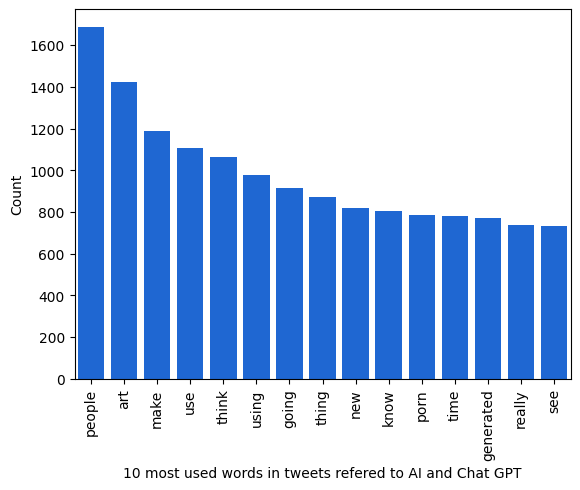

In [122]:
ax = sns.barplot(data=top_250_words.head(15), x='Word', y='Count', orient='vertical', color='#0161F0')
ax.tick_params(axis='x', direction='out', labelsize=10, labelrotation=90)
ax.set_xlabel('10 most used words in tweets refered to AI and Chat GPT')
plt.show()

In [125]:
top_250_words.to_csv(top_250_words_filename, index=False)
df_words.to_csv(words_filename, index=False)